## CURE Clustering

Load in CURE.q which also loads in the kdtree file.

In [1]:
\l ../cure.q
plt:.p.import[`matplotlib]`:pyplot;

Clustering is useful in data mining and statistical data analysis for grouping similar data points together and identifying patterns in distributions.

The majority of clustering algorithms work well for spherical objects but break down when there are outliers in the dataset. A way to deal with these outliers is to use CURE clustering which is more rebust to datasets with large differences in size or caontaining outliers. 

In CURE clustering each cluster is represented by a certain number of representative points. These representative points are chosen from the cluster by taking the the most scattered points in the cluster and then shrinking them towards the centre of the cluster by a fixed amount. This amount is called the compression. This shrinking helps to reduce the effect of outliers. 

A k-d tree is also deployed in CURE clustering in order to store all the representative points of each cluster. 

The below creates an image with 4 different clusters, where datapts controls how many datapoints the shape has.

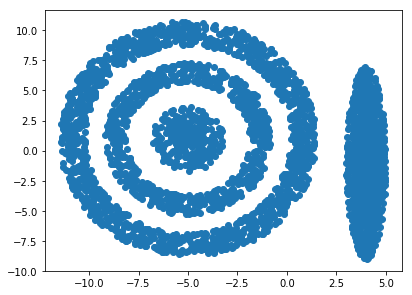

In [2]:
sample:(4000#"F";",")0:`:../data/aadata.csv
plt[`:scatter][;]. flip sample;
plt[`:show][];

cure is the function that breaks the function up into the desired cluster groups. The function takes 4 inputs cure[sample;x;y;z], where sample is the data that needs to be clustered, x is the amount of representative points, y is the compression which is number between 0 and 1, and z is the amount of clusters that the data is to be split into. The function returns the indices of the sample grouped into clusters

In [3]:
show cl:.kd.cure.cure[sample;30;0.01;4]

2131 1571 2036 874 2252 3106 65 2672 825 1326 2846 2572 3280 1019 1359 3874 1..
761 410 1636 464 1736 2544 164 3647 2283 1858 3167 3072 3807 2469 3510 3548 2..
2835 191 1606 2992 1773 1598 456 1053 2356 2087 513 1072 2043 2734 2661 735 3..
1588 2929 1547 1684 817 1277 1890 468 847 964 937 2926 360 1332 2409 1233 254..


To check if the clustering is correct, the results can be plotted using matplotlib, with each cluster represented with a different colour. 

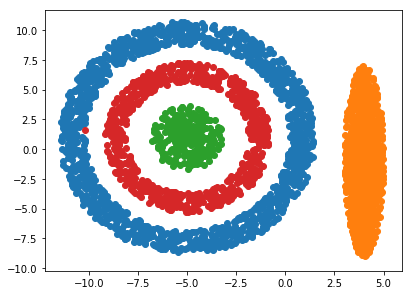

In [4]:
{plt[`:scatter][;]. flip sample[x]}each cl;
plt[`:show][];

### Adding compression to clustering

The following is an example of how adding the compression can make a difference when the dataset contains outliers and has varying sizes of clusters

In [5]:
FCPS_SAMPLES:.p.import[`pyclustering.samples.definitions]`:FCPS_SAMPLES;
readsam:.p.import[`pyclustering.utils]`:read_sample;
sample2:readsam[FCPS_SAMPLES[`:SAMPLE_TARGET]]`

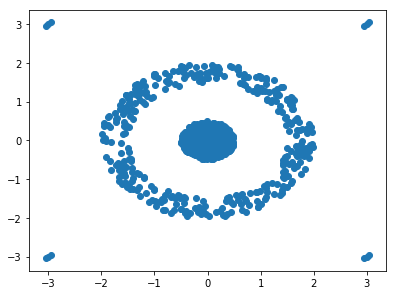

In [6]:
plt:.p.import[`matplotlib]`:pyplot;
plt[`:scatter][;]. flip sample2;
plt[`:show][];

From the above image there it is evident that there is a large spread of data points away from the centre which could cause issues if there is a small amount of representative points used.

In [7]:
show cl2:.kd.cure.cure[sample2;5;0;6]

484 737 708 421 704 519 416 730 573 510 456 743 521 493 452 412 499 697 634 7..
0 766 399
3 402 769
688 689 143 172 147 112 375 117 140 302 390 96 334 202 331 233 312 317 377 33..
1 767 400
401 2 768


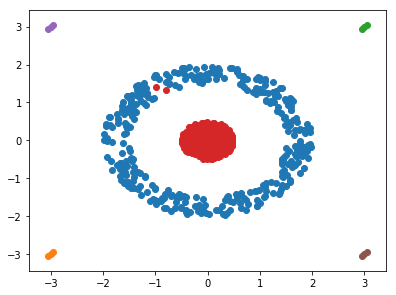

In [8]:
{plt[`:scatter][;]. flip sample2[x]}each cl2;
plt[`:show][];

The above image shows how the centre cluster and its surrounding ring are not classified correctly. This can be rectified by adding a compressing which moves the representative points of each cluster towards its centre to deal with varying shapes and outliers.

In [9]:
show clcomp:.kd.cure.cure[sample2;5;0.1;6]

273 295 286 20 239 394 325 151 61 397 285 54 80 232 240 114 162 287 288 234 2..
0 766 399
3 402 769
534 763 723 708 493 412 499 697 452 634 718 421 704 519 416 510 730 573 456 7..
1 767 400
401 2 768


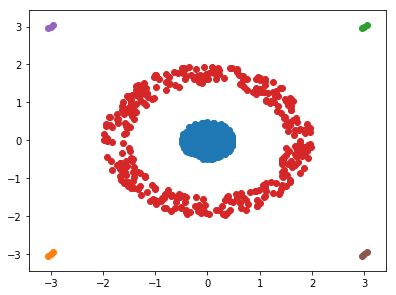

In [10]:
{plt[`:scatter][;]. flip sample2[x]}each clcomp;
plt[`:show][];

By adding a compression of 0.1, the datapoints were correctly clusters.

## Higher dimenion clustering

The CURE clustering function also works for datasets of higher dimenions as shown below

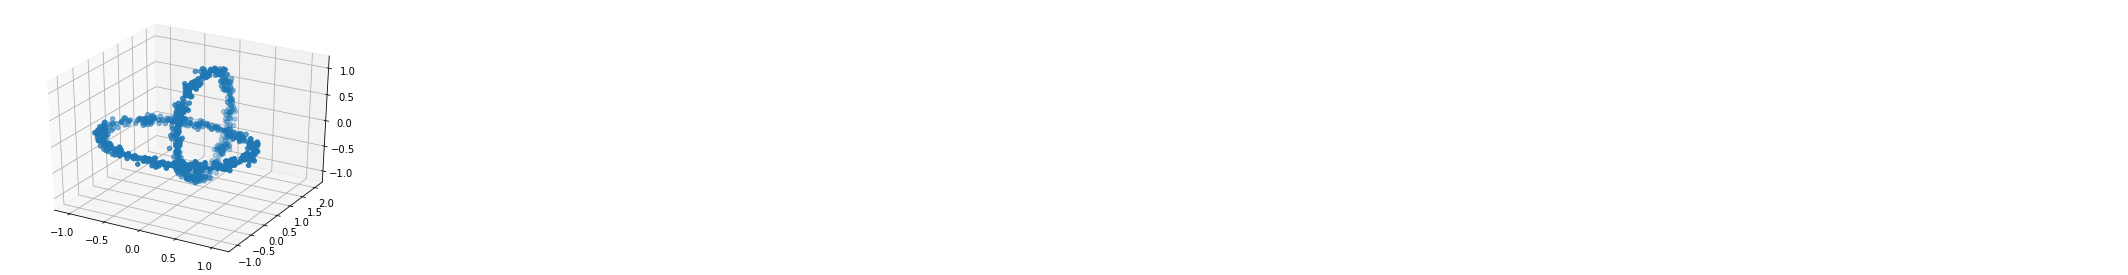

In [11]:
hdsample:readsam[FCPS_SAMPLES[`:SAMPLE_CHAINLINK]]`

.p.import[`mpl_toolkits.mplot3d]`:Axes3D;
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
ax[`:scatter][[hdsample][;0];[hdsample][;1];[hdsample][;2]];
plt[`:show][];

In [12]:
hdcl:.kd.cure.cure[hdsample;10;0.1;2]

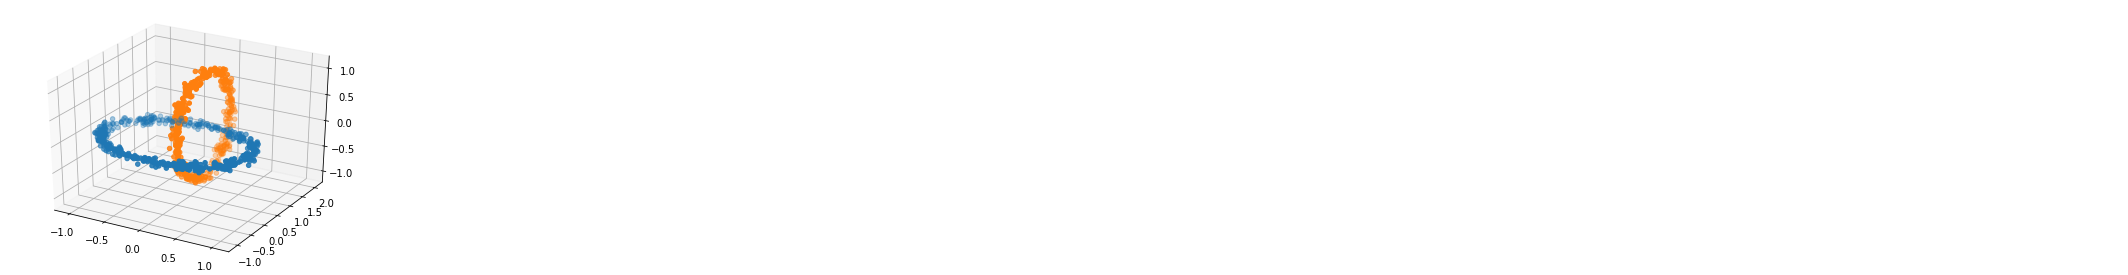

In [13]:
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
ax[`:scatter][[hdsample hdcl][0][;0];[hdsample hdcl][0][;1];[hdsample hdcl][0][;2]];
ax[`:scatter][[hdsample hdcl][1][;0];[hdsample hdcl][1][;1];[hdsample hdcl][1][;2]];
plt[`:show][];